# Instructions

## Dataset and Goal
The Sarcasm on Reddit dataset provides comments posted on Reddit labeled as sarcastic (1) or not sarcastic (0). The task of the project is, given only the parent comment and the Reddit category (subreddit), to predict the probability of a parent comment to receive a sarcastic comment.

## Evaluation strategy
Cross-validation.

## Dataset
[Sarcasm on Reddit](https://www.kaggle.com/danofer/sarcasm)

## References
[Khodak, M., Saunshi, N., & Vodrahalli, K. (2017). A large self-annotated corpus for sarcasm](https://arxiv.org/abs/1704.05579)

[Eke, C. I., Norman, A. A., Shuib, L.,  & Nweke, H. F. (2019). Sarcasm identification in textual data:  systematic review, research challenges and open directions. Artificial Intelligence Review, 1-44](https://link.springer.com/article/10.1007/s10462-019-09791-8)

[Joshi, A., Bhattacharyya, P., & Carman, M. J. (2017). Automatic sarcasm detection: A survey. ACM Computing Surveys (CSUR), 50(5), 1-22](https://dl.acm.org/doi/abs/10.1145/3124420)

# Project

## Import Dataset

In [4]:
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [5]:
for dirname, _, filenames in os.walk('C:/Users/User/Desktop/university/text mining/ferrara/project/dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:/Users/User/Desktop/university/text mining/ferrara/project/dataset\test-balanced.csv
C:/Users/User/Desktop/university/text mining/ferrara/project/dataset\test-unbalanced.csv
C:/Users/User/Desktop/university/text mining/ferrara/project/dataset\train-balanced-sarc.csv.gz
C:/Users/User/Desktop/university/text mining/ferrara/project/dataset\train-balanced-sarcasm.csv


In [6]:
nRowsRead = None # specify 'None' if want to read whole file
# train-balanced-sarcasm.csv has 1010826 rows in reality, but we are only loading/previewing the first 1000 rows
df_train = pd.read_csv('C:/Users/User/Desktop/university/text mining/ferrara/project/dataset/train-balanced-sarcasm.csv', delimiter=',', nrows = nRowsRead)
df_train.dataframeName = 'train-balanced-sarcasm.csv'
nRow, nCol = df_train.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1010826 rows and 10 columns


In [7]:
nRowsRead = None # # specify 'None' if want to read whole file, else an int to retrieve a subset of rows
# train-balanced-sarcasm.csv has 1010826 rows in reality, but we are only loading/previewing the first 1000 rows
df_train = pd.read_csv('C:/Users/User/Desktop/university/text mining/ferrara/project/dataset/train-balanced-sarcasm.csv', delimiter=',', nrows = nRowsRead)
df_train.dataframeName = 'train-balanced-sarcasm.csv'
nRow, nCol = df_train.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1010826 rows and 10 columns


In [9]:
df_test.head(5)

,7u1ht,c07em3g,1
0,7u92p,c07f8sq c07flil c07fgh5 c07f9ck c07fn0s c07fl0...,0 0 0 0 0 0 0 0 0 0 0
1,7vvpw,c07khcb c07jx0k c07jzxi c07k0t3 c07jx2j,0 0 0 0 0
2,7vv27 c07ju7y,c07jub3,1
3,7wco4,c07l718 c07lfcd c07l7zu,0 0 0
4,7xgdr,c07o9qu,1


In [13]:
nRowsRead = None # specify 'None' if want to read whole file, else an int to retrieve a subset of rows
# test-unbalanced.csv has 63997 rows in reality, but we are only loading/previewing the first 1000 rows
df_test_unbal = pd.read_csv('C:/Users/User/Desktop/university/text mining/ferrara/project/dataset/test-unbalanced.csv', delimiter=',', nrows = nRowsRead)
df_test_unbal.dataframeName = 'test-unbalanced.csv'
nRow, nCol = df_test_unbal.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 63997 rows and 3 columns


In [14]:
nRowsRead = None # specify 'None' if want to read whole file, else an int to retrieve a subset of rows
# test-unbalanced.csv has 63997 rows in reality, but we are only loading/previewing the first 1000 rows
df_test_bal = pd.read_csv('C:/Users/User/Desktop/university/text mining/ferrara/project/dataset/test-balanced.csv', delimiter=',', nrows = nRowsRead)
df_test_bal.dataframeName = 'test-unbalanced.csv'
nRow, nCol = df_test_bal.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 32332 rows and 3 columns


In [9]:
df_train.head(5)

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [15]:
df_test_unbal.head(5)

,7u1ht,c07em3g,1
0,7u92p,c07f8sq c07flil c07fgh5 c07f9ck c07fn0s c07fl0...,0 0 0 0 0 0 0 0 0 0 0
1,7vvpw,c07khcb c07jx0k c07jzxi c07k0t3 c07jx2j,0 0 0 0 0
2,7vv27 c07ju7y,c07jub3,1
3,7wco4,c07l718 c07lfcd c07l7zu,0 0 0
4,7xgdr,c07o9qu,1


In [16]:
df_test_bal.head(5)

,7x7dx,c07nkao c07nk63,1 0
0,7xtxk,c07pji4 c07ppds,1 0
1,7zh5l,c07twag c07twp2,1 0
2,80nmo,c07y1rj c07xhyn,0 1
3,8139p,c07yhlm c07yoiw,1 0
4,bnmod,c0nnujf c0nofrs,1 0


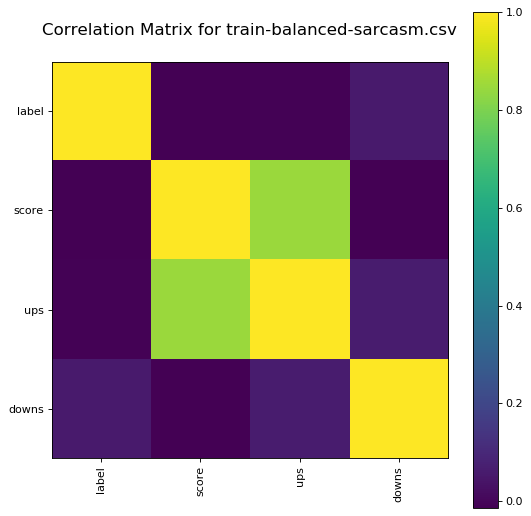

In [12]:
import matplotlib.pyplot as plt # plotting

# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()
    
plotCorrelationMatrix(df_train, 8)

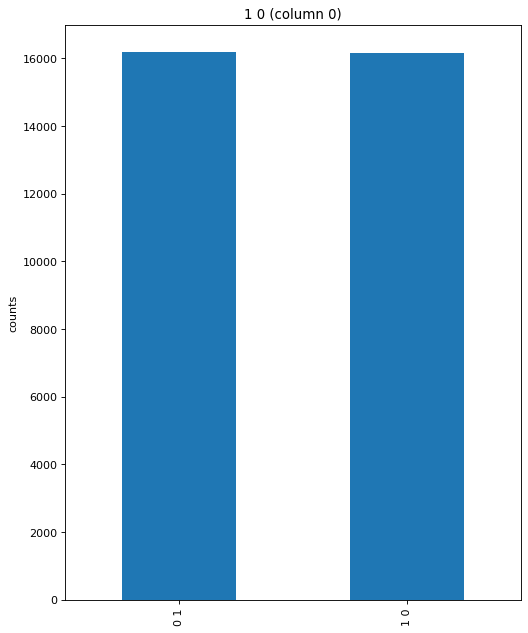

In [21]:
import numpy as np

# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

plotPerColumnDistribution(df_test_bal, 10, 5)

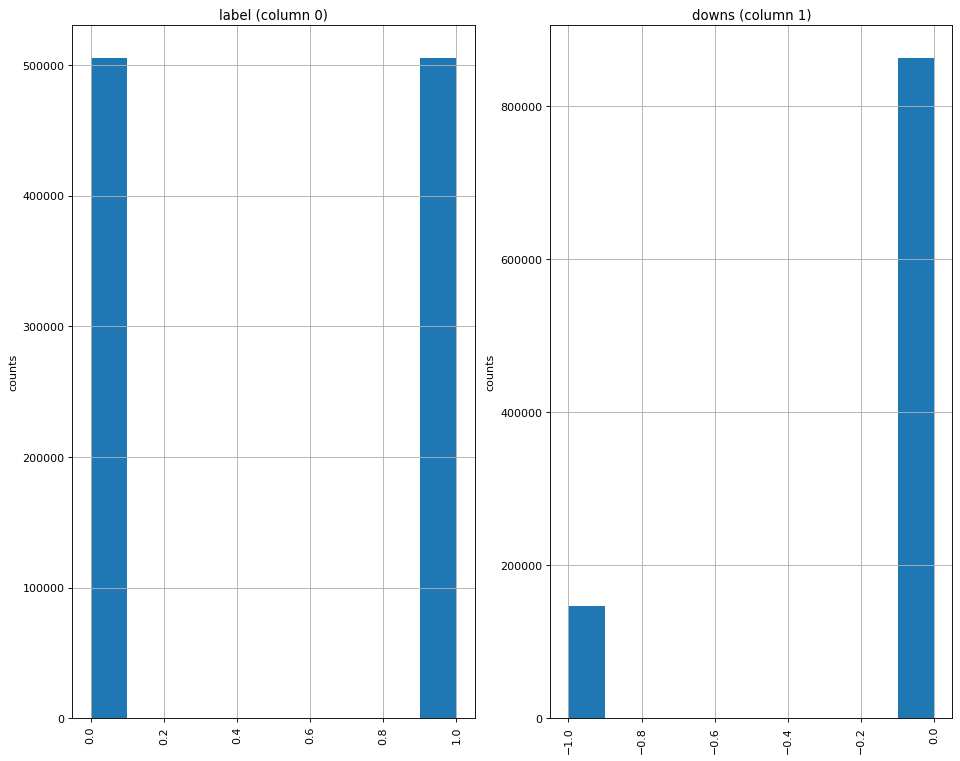

In [22]:
plotPerColumnDistribution(df_train, 10, 5)

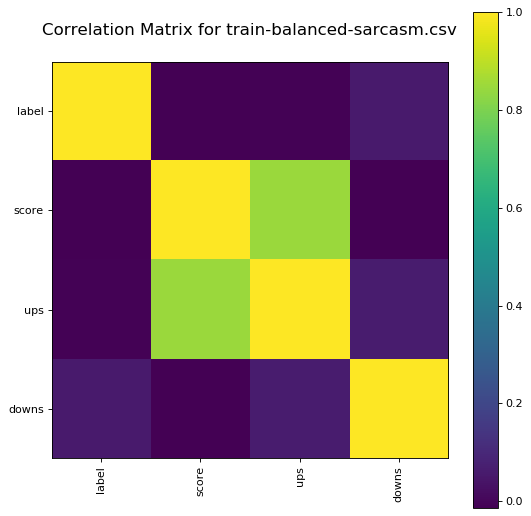

In [23]:
plotCorrelationMatrix(df_train, 8)

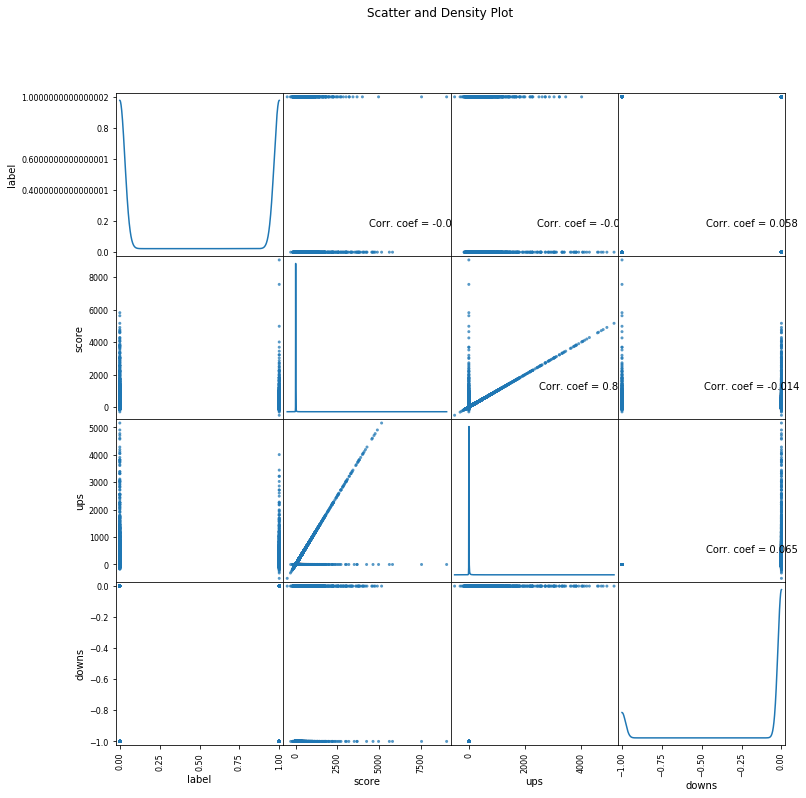

In [ ]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

plotScatterMatrix(df_train, 12, 10)